In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split , KFold, LeaveOneOut, cross_val_score


# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [3]:
iris = load_iris()

In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]
df_iris.head()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [45]:
X,y = df_iris.drop(['target','class'],axis=1) , df_iris['target']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.decomposition import PCA
pca_95 = PCA(n_components=2)

In [25]:
X_train_scaled_pca = pca_95.fit_transform(X_train_scaled)
X_test_scaled_pca = pca_95.transform(X_test_scaled)

In [26]:
pca_95.explained_variance_ratio_

array([0.72229951, 0.2397406 ])

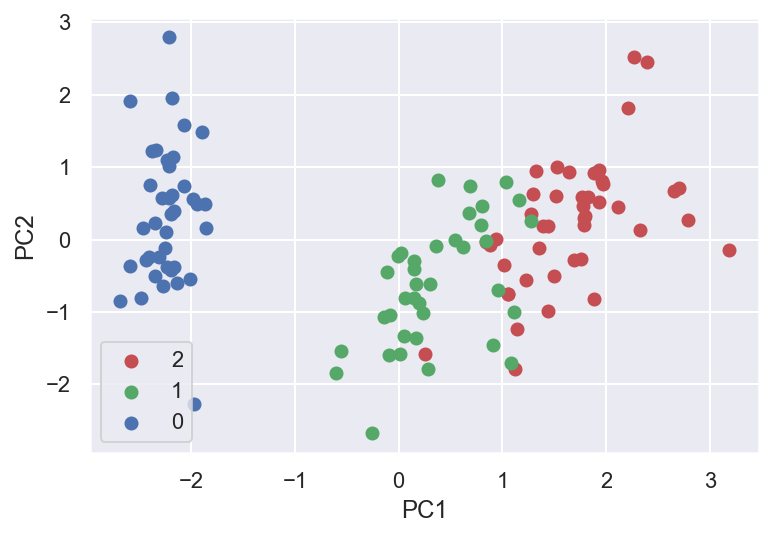

In [40]:
colors = ["r", "g", "b"]

for label, color in zip(Y_train.unique(), colors):
    plt.scatter(X_train_scaled_pca[Y_train==label, 0], 
                X_train_scaled_pca[Y_train==label, 1], c=color, label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
model=  LogisticRegression() 

In [30]:
model.fit(X_train_scaled_pca ,Y_train)

LogisticRegression()

In [31]:
predictions = model.predict(X_test_scaled_pca)
predictions

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [32]:
score = model.score(X_test_scaled_pca,Y_test)
score

0.8666666666666667

## Using Regression model without the PCA

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled,Y_train)
log_predictions = log_model.predict(X_test_scaled)
log_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [46]:
log_score = log_model.score(X_test_scaled,Y_test)
log_score

ValueError: Expected 2D array, got 1D array instead:
array=[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.